## step:1
Importing necessary imports.

In [1]:
# important imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

## step:2
About Dataset.

In [2]:
# downloading the dataset and making a pandas dataframe from the dataset
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
# inspect the size and important features of the dataset.
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### what we got?
The dataset contains 6 variables in total.
**Age** and **Na_to_K** variables contain numerical values and are continuous variables.
Rest of the variables are categorical variables and contain object type i.e. string type values.
Our target variable is Drug.
The rest are feature variables.


## step:3
Pre-processing.

In [5]:
# creating a matrix of feature variables from dataset.
X = df.loc[:,["Age","Sex","BP","Cholesterol","Na_to_K"]]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [6]:
X.shape

(200, 5)

As there are categorical values in certain columns, so let us encode them into their numerical values.

In [7]:
from sklearn import preprocessing

In [8]:
encoder_for_sex = preprocessing.LabelEncoder()
encoder_for_sex.fit(['F','M'])
X["Sex"] = encoder_for_sex.transform(X['Sex'])

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,HIGH,HIGH,25.355
1,47,1,LOW,HIGH,13.093
2,47,1,LOW,HIGH,10.114
3,28,0,NORMAL,HIGH,7.798
4,61,0,LOW,HIGH,18.043


So, now for female there is 0 and for male there is 1 in the dataset X

Doing the same for other variables which contain object type categorical values.

In [10]:
# doing the same for BP columns
X['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [11]:
encoder_for_bp = preprocessing.LabelEncoder()
encoder_for_bp.fit(['HIGH', 'LOW', 'NORMAL'])
X["BP"] = encoder_for_bp.transform(X['BP'])
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,HIGH,25.355
1,47,1,1,HIGH,13.093
2,47,1,1,HIGH,10.114
3,28,0,2,HIGH,7.798
4,61,0,1,HIGH,18.043


In [12]:
X['BP'].unique()

array([0, 1, 2])

In [13]:
# doing the same for Cholesterol feature.
X['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [14]:
encoder_for_cholesterol = preprocessing.LabelEncoder()
encoder_for_cholesterol.fit(['HIGH', 'NORMAL'])
X['Cholesterol'] = encoder_for_cholesterol.transform(X['Cholesterol'])
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [15]:
X['Cholesterol'].unique()

array([0, 1])

In [16]:
X_array = X.values

In [17]:
type(X_array)

numpy.ndarray

In [18]:
# making arrray of response variable
y = df['Drug'].values

In [19]:
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

## Step:4
Setting up decision tree

In [20]:
#making and training and test sets.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, shuffle=True, random_state = 42)

In [24]:
# printing the size of datasets
print(x_train.shape)
print(y_train.shape)

(150, 5)
(150,)


In [26]:
print(x_test.shape)
print(y_test.shape)

(50, 5)
(50,)


In [27]:
# Now building our decision tree model

In [28]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [29]:
decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Step:5
Making prediction on the test dataset.

In [31]:
predictions = decision_tree.predict(x_test)

In [33]:
# Let us see whether the model works properly or not.
print(y_test[0:5])
print(predictions[0:5])

['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
['drugX' 'drugY' 'drugX' 'drugC' 'drugY']


It seems that the model works properly.

## Step:6
Model evaluation.

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print(f'The accuracy score of the model is: {accuracy_score(y_test,predictions)}')

The accuracy score of the model is: 1.0


The accuracy score of 1.0 shows that our model works 100% accurately on the test data.

## Step:7
Visualising the model tree.

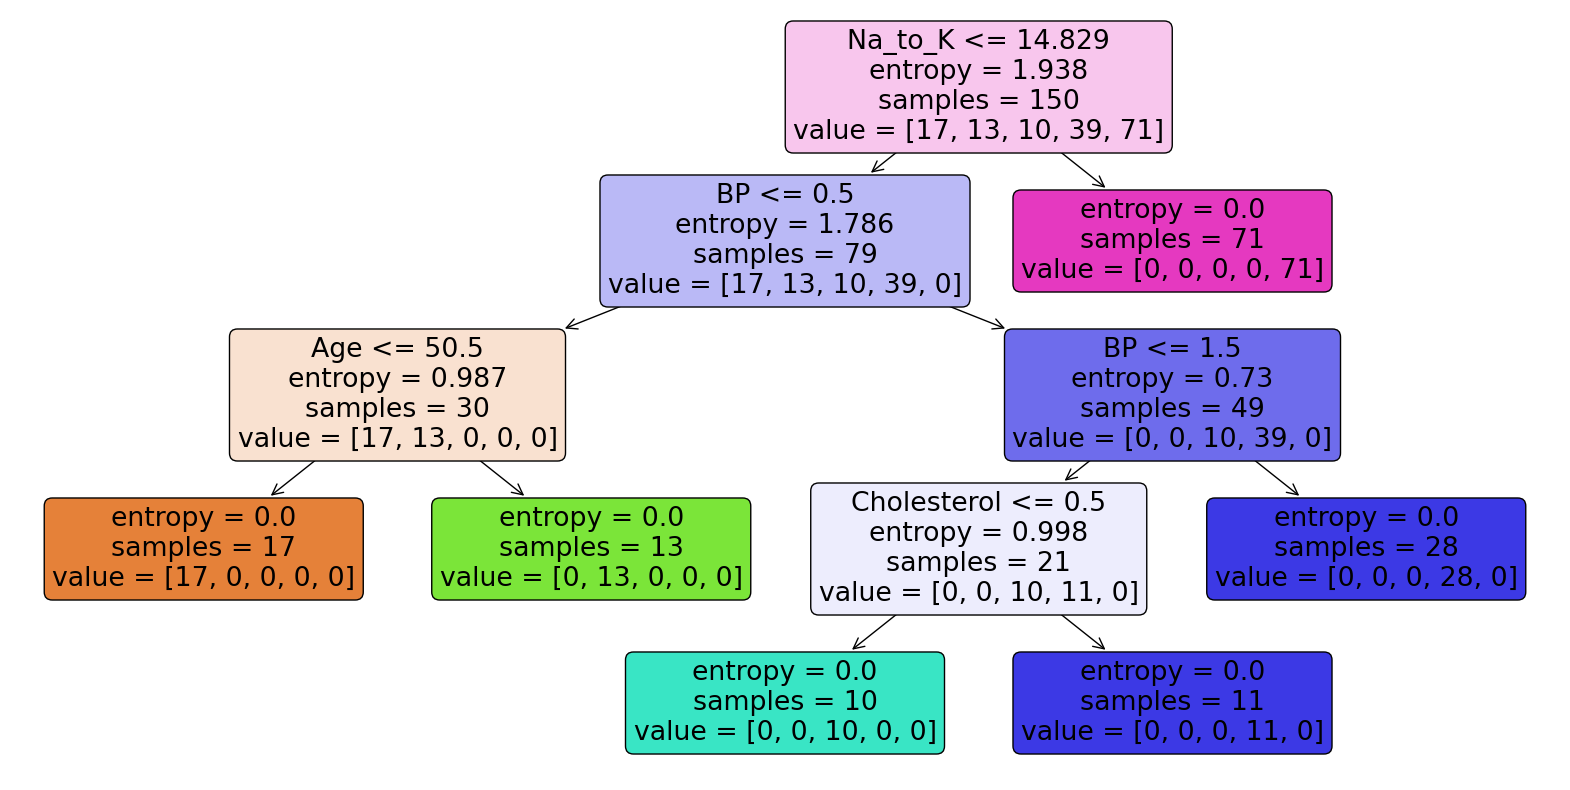

In [52]:
# Plot the decision tree using matplotlib
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, feature_names=["Age","Sex","BP","Cholesterol","Na_to_K"] , filled=True, rounded = True)
plt.savefig("decision_tree.png")  # Save the plot as a PNG file
plt.show()  # Display the plot